In [67]:
import pandas as pd
import numpy as np
import scipy.stats as stats
import matplotlib.pyplot as plt
import seaborn as sns


from sklearn.preprocessing import OneHotEncoder

In [5]:
star_data = pd.read_csv('/Users/katyaluchette/Downloads/star_data.csv')

In [6]:
star_data.head()

,Temperature (K),Luminosity(L/Lo),Radius(R/Ro),Absolute magnitude(Mv),Star type,Star color,Spectral Class
0,3068,0.002400,0.1700,16.12,0,Red,M
1,3042,0.000500,0.1542,16.60,0,Red,M
2,2600,0.000300,0.1020,18.70,0,Red,M
3,2800,0.000200,0.1600,16.65,0,Red,M
4,1939,0.000138,0.1030,20.06,0,Red,M


In [7]:
star_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 240 entries, 0 to 239
Data columns (total 7 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Temperature (K)         240 non-null    int64  
 1   Luminosity(L/Lo)        240 non-null    float64
 2   Radius(R/Ro)            240 non-null    float64
 3   Absolute magnitude(Mv)  240 non-null    float64
 4   Star type               240 non-null    int64  
 5   Star color              240 non-null    object 
 6   Spectral Class          240 non-null    object 
dtypes: float64(3), int64(2), object(2)
memory usage: 13.2+ KB


In [8]:
star_data.describe()

,Temperature (K),Luminosity(L/Lo),Radius(R/Ro),Absolute magnitude(Mv),Star type
count,240.000000,240.000000,240.000000,240.000000,240.000000
mean,10497.462500,107188.361635,237.157781,4.382396,2.500000
std,9552.425037,179432.244940,517.155763,10.532512,1.711394
min,1939.000000,0.000080,0.008400,-11.920000,0.000000
25%,3344.250000,0.000865,0.102750,-6.232500,1.000000
50%,5776.000000,0.070500,0.762500,8.313000,2.500000
75%,15055.500000,198050.000000,42.750000,13.697500,4.000000
max,40000.000000,849420.000000,1948.500000,20.060000,5.000000


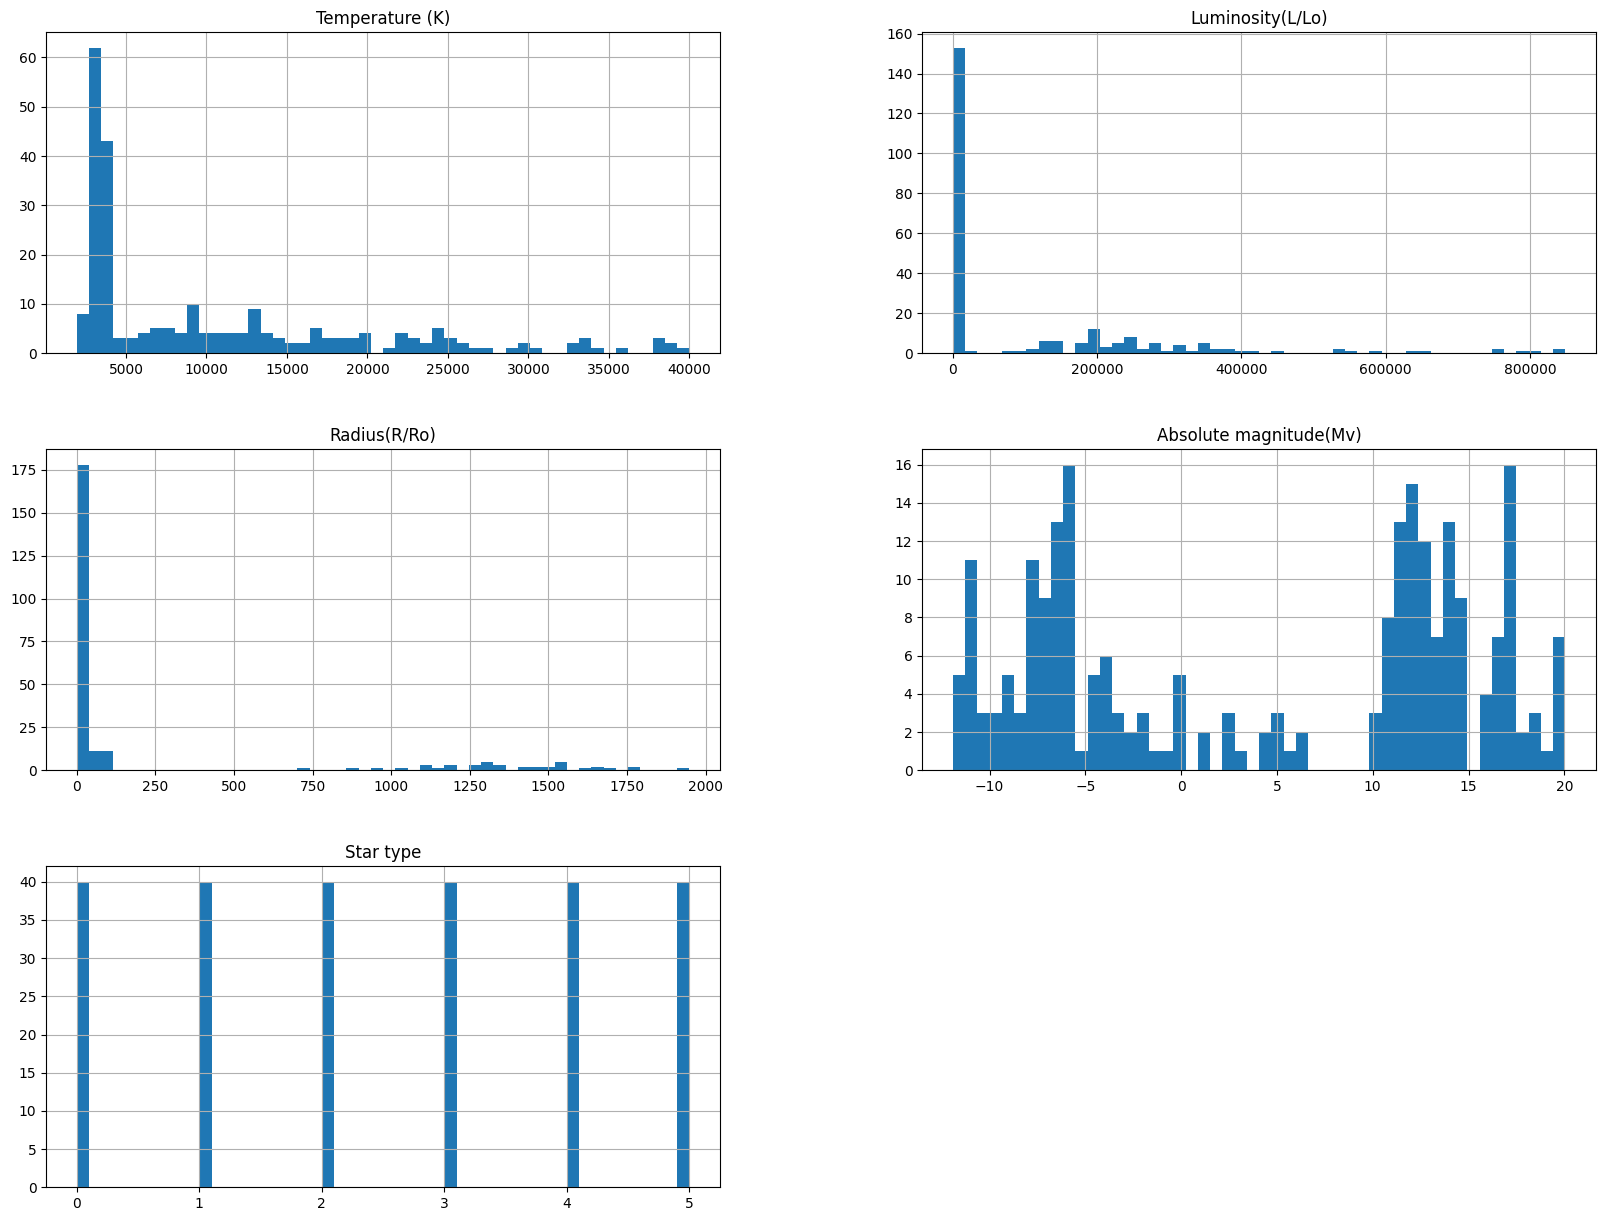

In [9]:
import matplotlib.pyplot as plt
star_data.hist(bins=50, figsize=(20,15))
plt.show()

In [10]:
from sklearn.model_selection import train_test_split
train_set, test_set = train_test_split(star_data, test_size=0.2, random_state=42)

In [12]:
stars = train_set.copy()

<function matplotlib.pyplot.show(close=None, block=None)>

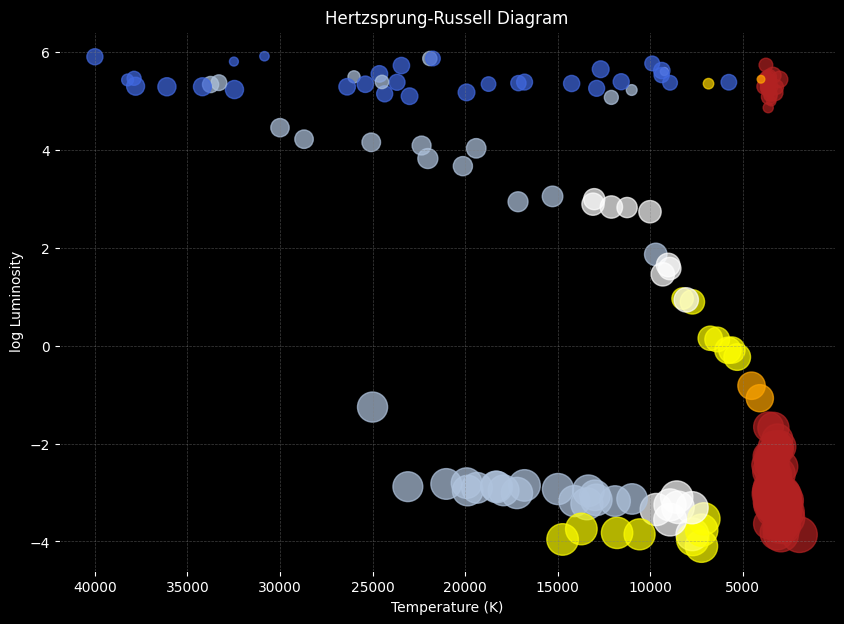

In [46]:
def spectral_class_to_color(spectral_class):
    if spectral_class == "M":
        return "firebrick"
    if spectral_class == "O":
        return "royalblue"
    if spectral_class == "B":
        return "lightsteelblue"
    if spectral_class == "F":
        return "yellow"
    if spectral_class == "A":
        return "white"
    if spectral_class == "G":
        return "gold"
    if spectral_class == "K":
        return "orange"


stars["log_Luminosity"] = np.log10(stars["Luminosity(L/Lo)"])
stars["color"] = stars["Spectral Class"].apply(spectral_class_to_color)

fig, ax = plt.subplots(figsize = (10,7))

scatter = ax.scatter(
    stars["Temperature (K)"],
    stars["log_Luminosity"],
    c = stars["color"],
    s = (stars["Absolute magnitude(Mv)"] - stars["Absolute magnitude(Mv)"].min() + 1) * 20,
    alpha = 0.7
)

ax.invert_xaxis()

ax.set_title("Hertzsprung-Russell Diagram", color="white")
ax.set_xlabel("Temperature (K)", color="white")
ax.set_ylabel("log Luminosity", color="white")

ax.set_facecolor("black")
fig.patch.set_facecolor("black")

ax.grid(color = "gray", linestyle = "--", linewidth = 0.5, alpha = 0.5)
ax.tick_params(colors="white")

plt.show


In [59]:
stars_for_corr = train_set.copy()

In [60]:
corr_matrix = stars_for_corr.corr(numeric_only = True)

In [61]:
corr_matrix["Star type"].sort_values(ascending=False)

Star type                 1.000000
Luminosity(L/Lo)          0.677385
Radius(R/Ro)              0.645644
Temperature (K)           0.414871
Absolute magnitude(Mv)   -0.952069
Name: Star type, dtype: float64

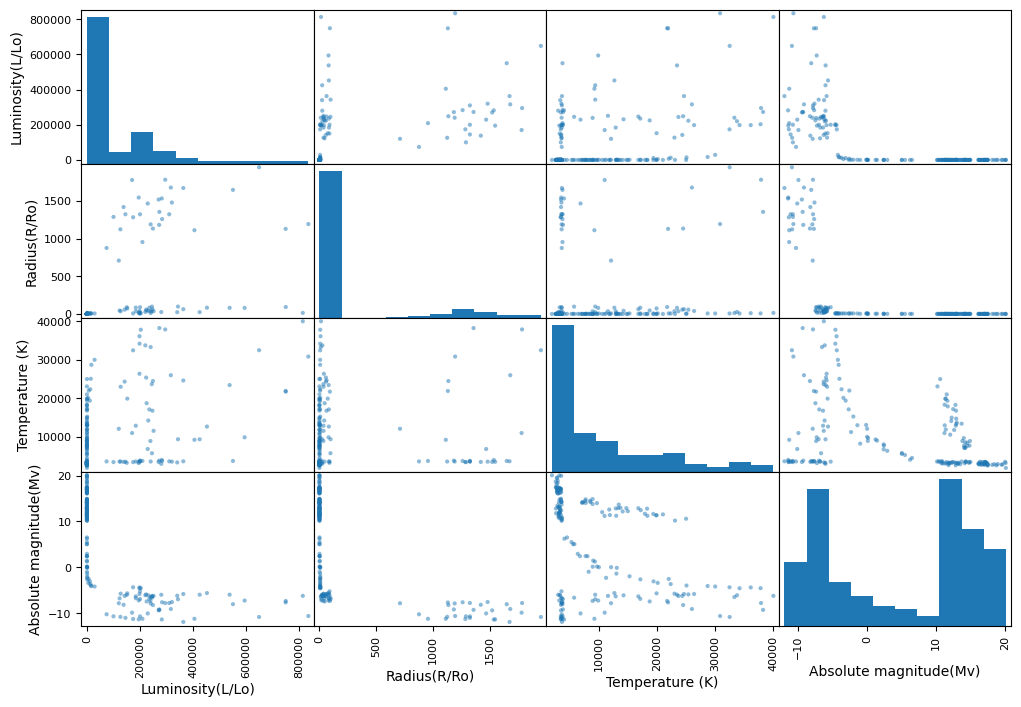

In [62]:
from pandas.plotting import scatter_matrix

attributes = ["Luminosity(L/Lo)", "Radius(R/Ro)", "Temperature (K)", "Absolute magnitude(Mv)"]
scatter_matrix(stars_for_corr[attributes], figsize=(12,8))
plt.show()

In [63]:
stars_for_corr["log Luminosity"] = np.log10(stars["Luminosity(L/Lo)"])

In [64]:
corr_matrix = stars_for_corr.corr(numeric_only=True)
corr_matrix["Star type"].sort_values(ascending=False)

Star type                 1.000000
log Luminosity            0.898097
Luminosity(L/Lo)          0.677385
Radius(R/Ro)              0.645644
Temperature (K)           0.414871
Absolute magnitude(Mv)   -0.952069
Name: Star type, dtype: float64

In [65]:
stars = train_set.drop("Star type", axis=1)
stars_labels = train_set["Star type"].copy()

In [66]:
stars_labels.value_counts()

Star type
2    34
1    33
0    32
4    32
3    32
5    29
Name: count, dtype: int64

In [69]:
stars["Spectral Class"].value_counts()

Spectral Class
M    90
B    36
O    30
A    17
F    15
K     3
G     1
Name: count, dtype: int64

In [70]:
stars["Star color"].value_counts()

Star color
Red                   91
Blue                  43
Blue-white            20
yellow-white           7
Blue White             7
White                  6
white                  3
Blue white             3
yellowish              2
Yellowish White        2
Whitish                2
Blue white             1
Orange                 1
White-Yellow           1
Pale yellow orange     1
Blue                   1
Blue-White             1
Name: count, dtype: int64

In [73]:
## idea from https://www.kaggle.com/code/eynardm/startypeprediction-100-star-data#Preprocessing
def fix_spelling_star_color(color):
    color = color.lower()
    if "yellow" in color and "white" in color:
        return "white yellow"
    else: 
        color = color.strip()
        color = color.replace("-", " ")
        return color

In [74]:
stars["Star color"] = stars["Star color"].apply(fix_spelling_star_color)

In [75]:
stars["Star color"].value_counts()

Star color
red                   91
blue                  44
blue white            32
white yellow          10
white                  9
whitish                2
yellowish              2
pale yellow orange     1
orange                 1
Name: count, dtype: int64

In [77]:
stars_cat = stars[["Star color", "Spectral Class"]]
encoder = OneHotEncoder(sparse_output=False)
encoded_data = encoder.fit_transform(stars_cat)
encoded_stars = pd.DataFrame(encoded_data, columns = encoder.get_feature_names_out(["Star color", "Spectral Class"]))
encoded_stars.index = stars.drop(["Star color", "Spectral Class"], axis=1).index
stars_encoded = pd.concat([stars.drop(["Star color", "Spectral Class"], axis=1), encoded_stars], axis=1)


In [79]:
stars["log Luminosity"] = np.log10(stars["Luminosity(L/Lo)"])